In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Data/Breast_cancer_wisconsin.csv')
df = df.iloc[:,:-1]

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

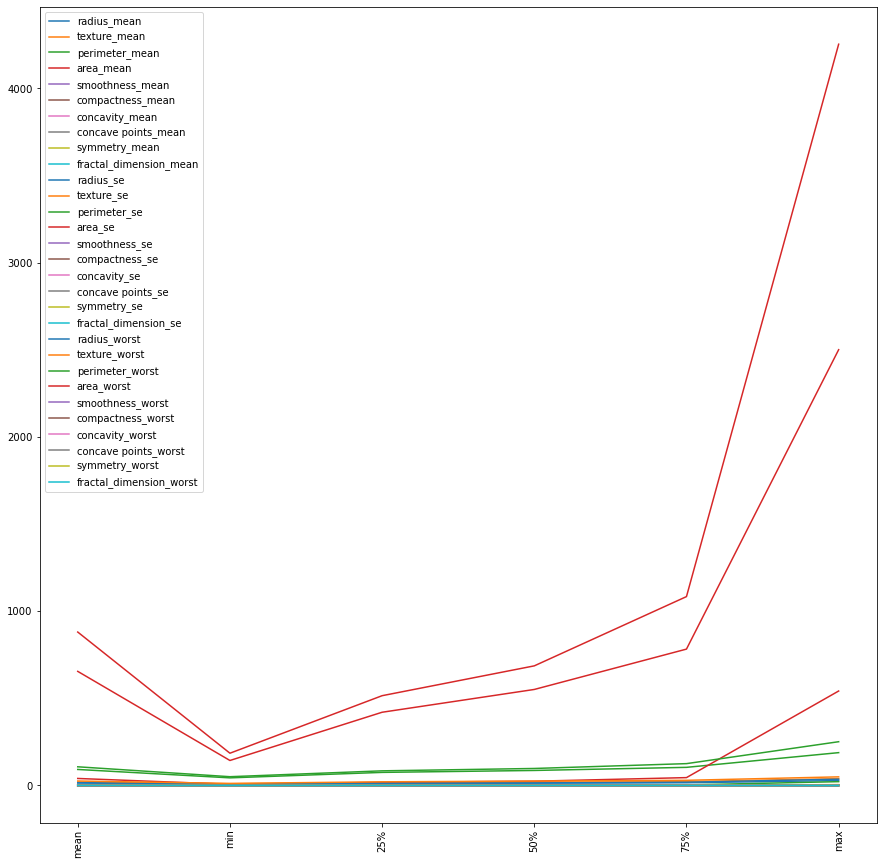

In [5]:
plt.figure(figsize=(15,15))
for i in range(len(df.describe().T[['mean', 'min', '25%', '50%', '75%', 'max']].iloc[1:,:].index)):
    plt.plot(df.describe().T[['mean', 'min', '25%', '50%', '75%', 'max']].iloc[1:,:].columns, 
            df.describe().T[['mean', 'min', '25%', '50%', '75%', 'max']].iloc[1:,:].iloc[i,:],
             label=df.describe().T[['mean', 'min', '25%', '50%', '75%', 'max']].iloc[1:,:].index[i])
plt.xticks(rotation=90)
plt.legend()
plt.show()

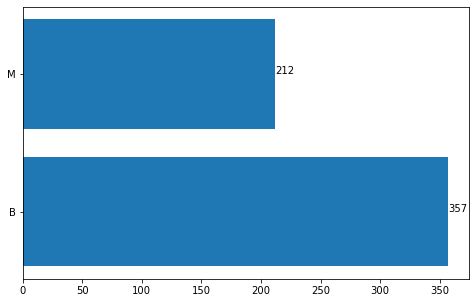

In [6]:
plt.figure(figsize=(8,5))
plt.barh(df.diagnosis.value_counts().index,df.diagnosis.value_counts().values)
for index, value in enumerate(df.diagnosis.value_counts().values.tolist()):
    plt.text(value, index, str(value))
plt.show()

<AxesSubplot:>

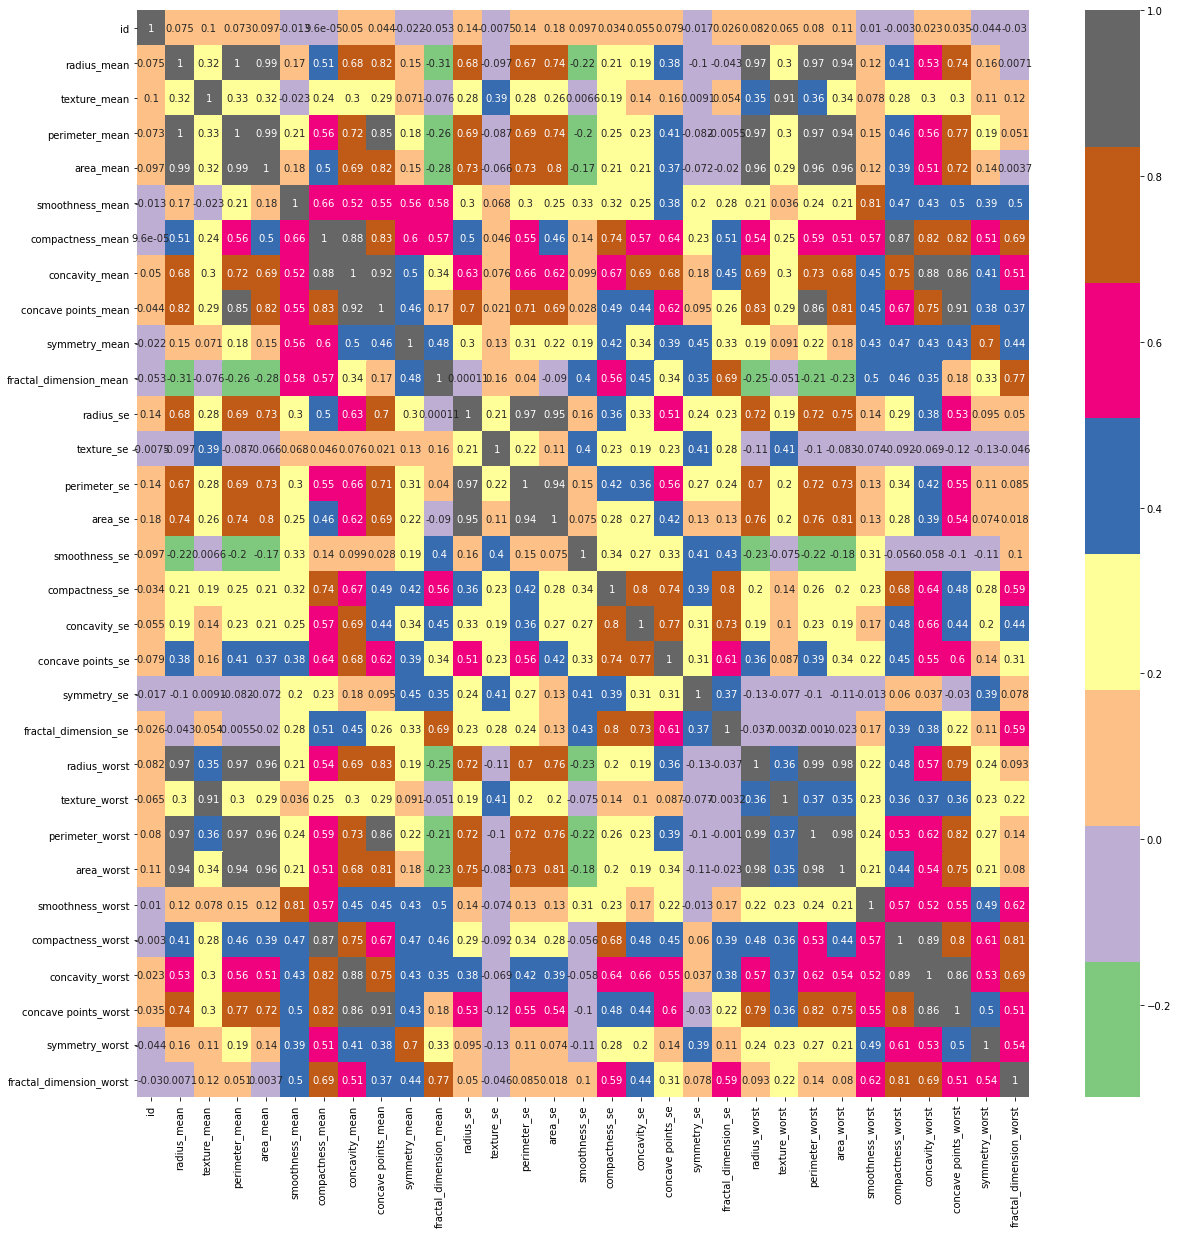

In [7]:
f,ax = plt. subplots(figsize = (20,20))
sns.heatmap(df.corr(), annot=True, cmap='Accent')

In [8]:
X = df.drop("diagnosis", axis = 1)
y = df.diagnosis

In [9]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(pd.DataFrame(vif))

      VIF Factor                 features
0       1.163246                       id
1   63309.441555              radius_mean
2     251.432664             texture_mean
3   58123.587378           perimeter_mean
4    1287.411538                area_mean
5     393.514898          smoothness_mean
6     201.166758         compactness_mean
7     157.899635           concavity_mean
8     154.297834      concave points_mean
9     184.429153            symmetry_mean
10    629.688286   fractal_dimension_mean
11    237.257123                radius_se
12     24.758627               texture_se
13    211.410744             perimeter_se
14     73.436569                  area_se
15     26.330278            smoothness_se
16     44.948568           compactness_se
17     33.254271             concavity_se
18     54.030035        concave points_se
19     37.207715              symmetry_se
20     27.549724     fractal_dimension_se
21   9677.820028             radius_worst
22    343.005975            textur

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = 0.7,random_state=0)

In [11]:
sc = StandardScaler()
sc.fit_transform(X)

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## Logistic Regression

In [12]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_pred = log_reg.predict(x_test)
print("confusion_matrix :")
print(confusion_matrix(y_test, log_pred))
print()
print("classification_report :")
print(classification_report(y_test, log_pred))
print("acc_score :",accuracy_score(y_test, log_pred))

confusion_matrix :
[[108   0]
 [ 63   0]]

classification_report :
              precision    recall  f1-score   support

           B       0.63      1.00      0.77       108
           M       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171

acc_score : 0.631578947368421


## Decision Tree

In [13]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)
print("confusion_matrix :")
print(confusion_matrix(y_test, dtree_pred))
print()
print("classification_report :")
print(classification_report(y_test, dtree_pred))
print("acc_score :",accuracy_score(y_test, dtree_pred))

confusion_matrix :
[[97 11]
 [ 3 60]]

classification_report :
              precision    recall  f1-score   support

           B       0.97      0.90      0.93       108
           M       0.85      0.95      0.90        63

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.91       171
weighted avg       0.92      0.92      0.92       171

acc_score : 0.9181286549707602


## RandomForestClassifier Model

In [14]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print("confusion_matrix :")
print(confusion_matrix(y_test, rf_pred))
print()
print("classification_report :")
print(classification_report(y_test, rf_pred))
print("acc_score :",accuracy_score(y_test, rf_pred))

confusion_matrix :
[[105   3]
 [  2  61]]

classification_report :
              precision    recall  f1-score   support

           B       0.98      0.97      0.98       108
           M       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

acc_score : 0.9707602339181286


## kNNClassifier Model

In [15]:
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
knn_pred = kNN.predict(x_test)
print("confusion_matrix :")
print(confusion_matrix(y_test, knn_pred))
print()
print("classification_report :")
print(classification_report(y_test, knn_pred))
print("acc_score :",accuracy_score(y_test, knn_pred))

confusion_matrix :
[[101   7]
 [ 41  22]]

classification_report :
              precision    recall  f1-score   support

           B       0.71      0.94      0.81       108
           M       0.76      0.35      0.48        63

    accuracy                           0.72       171
   macro avg       0.73      0.64      0.64       171
weighted avg       0.73      0.72      0.69       171

acc_score : 0.7192982456140351


## SVMClassifier

In [16]:
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)
svm_pred = svc.predict(x_test)
print("confusion_matrix :")
print(confusion_matrix(y_test, svm_pred))
print()
print("classification_report :")
print(classification_report(y_test, svm_pred))
print("acc_score :",accuracy_score(y_test, svm_pred))

confusion_matrix :
[[108   0]
 [ 63   0]]

classification_report :
              precision    recall  f1-score   support

           B       0.63      1.00      0.77       108
           M       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171

acc_score : 0.631578947368421


## Naive Bayes

In [17]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)
print("confusion_matrix :")
print(confusion_matrix(y_test, nb_pred))
print()
print("classification_report :")
print(classification_report(y_test, nb_pred))
print("acc_score :",accuracy_score(y_test, nb_pred))

confusion_matrix :
[[107   1]
 [ 61   2]]

classification_report :
              precision    recall  f1-score   support

           B       0.64      0.99      0.78       108
           M       0.67      0.03      0.06        63

    accuracy                           0.64       171
   macro avg       0.65      0.51      0.42       171
weighted avg       0.65      0.64      0.51       171

acc_score : 0.6374269005847953


In [20]:
print("Logistic Regression:")
print(accuracy_score(y_test, log_pred))
print("Decision Tree:")
print(accuracy_score(y_test, dtree_pred))
print("Random Forest Classifier:")
print(accuracy_score(y_test, rf_pred))
print("KNN Classifier:")
print(accuracy_score(y_test, knn_pred))
print("SVM Classifier:")
print(accuracy_score(y_test, svm_pred))
print("Gaussian NB:")
print(accuracy_score(y_test, nb_pred))

Logistic Regression:
0.631578947368421
Decision_tree_acc_score:
0.9181286549707602
Random Forest Classifier:
0.9707602339181286
KNN Classifier:
0.7192982456140351
SVM Classifier:
0.631578947368421
Gaussian NB:
0.6374269005847953


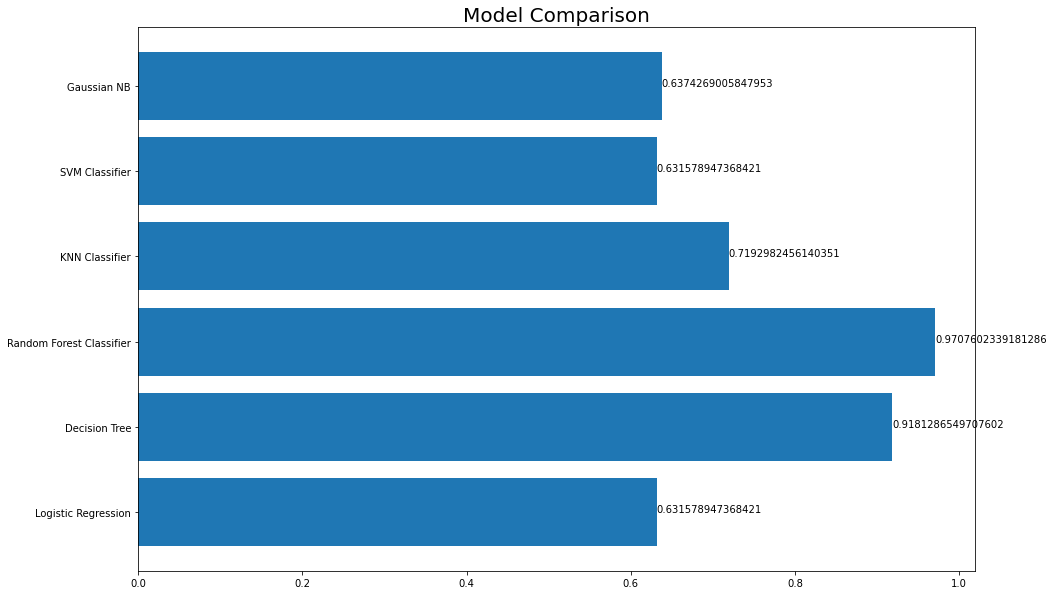

In [26]:
model = ["Logistic Regression","Decision Tree","Random Forest Classifier","KNN Classifier","SVM Classifier","Gaussian NB"]
score = [accuracy_score(y_test, log_pred),accuracy_score(y_test, dtree_pred),accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, knn_pred),accuracy_score(y_test, svm_pred),accuracy_score(y_test, nb_pred)]

plt.figure(figsize=(15,10))
plt.barh(model, score)
for index, value in enumerate(score):
    plt.text(value, index, str(value))
plt.title("Model Comparison",fontsize=20)
plt.show()